In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Градиентный спуск

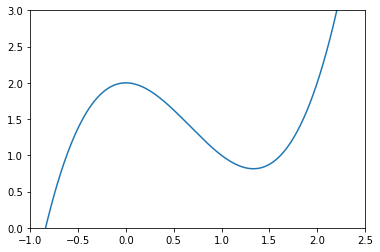

In [2]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

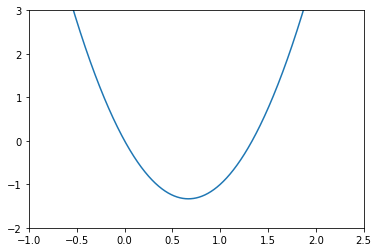

In [3]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [4]:
lr = 0.1
points = [2]
n_epochs = 100

In [5]:
points

[2]

In [6]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [7]:
y_points = [f(p) for p in points]


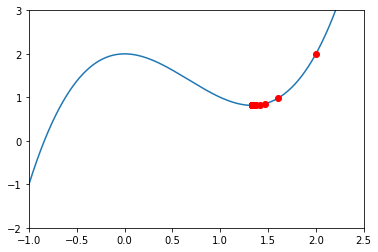

In [8]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

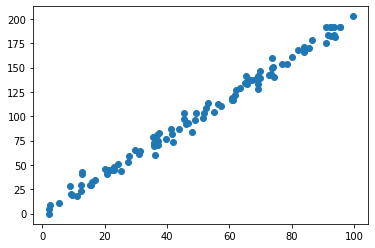

In [39]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)
plt.scatter(X, Y)
plt.show()

In [41]:
print(X[0])

45.608948034192075


## Применим метод градиентного спуска

In [11]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [12]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [13]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))

In [14]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))

In [15]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0043078419296565 t1: 1.2755084224287145 cost: 736.5248695211219
t0: 1.0074198708601034 t1: 1.4751234022287063 cost: 392.86151990720714
t0: 1.0096654945691865 t1: 1.6197511081310643 cost: 212.45629859481582
t0: 1.011283379733167 t1: 1.7245387410829787 cost: 117.75302352100469
t0: 1.0124464481413522 t1: 1.8004609420856652 cost: 68.03877083474015
t0: 1.0132799872686629 t1: 1.8554691964020107 cost: 41.94139295976817
t0: 1.0138747719760033 t1: 1.895324614384409 cost: 28.241634465245856
t0: 1.0142965716100465 t1: 1.9242013083395721 cost: 21.049975265585484
t0: 1.0145930382070332 t1: 1.945123558741803 cost: 17.27472651812255
t0: 1.0147986972210323 t1: 1.9602825554094832 cost: 15.292913895415955
t0: 1.0149385634693031 t1: 1.9712658868156314 cost: 14.252561082390512
t0: 1.015030761002615 t1: 1.9792238125765158 cost: 13.706425242744752
t0: 1.015088421286725 t1: 1.9849897332914124 cost: 13.419727367856428
t0: 1.0151210584967512 t1: 1.989167474869751 cost: 13.269220804195022
t0: 1.0151355659

In [16]:
cost_function(X,Y,10,10)

91299.27605703275

In [55]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)  
    print("param0:", params[0], "param1:", params[1], "cost:", cost)

param0: -1.1263578640264593 param1: 1.2107469335314553 cost: 2604.443390019403
param0: -1.122117500204134 param1: 1.4876434925451394 cost: 1142.6515580715607
param0: -1.1192991871432536 param1: 1.6703533328469358 cost: 506.18474892548693
param0: -1.1174192144898865 param1: 1.7909140829786878 cost: 229.06593699380025
param0: -1.1161584060499985 param1: 1.8704657666351694 cost: 108.40788843997267
param0: -1.1153061534667257 param1: 1.9229576248231517 cost: 55.873137265651785
param0: -1.1147234868519276 param1: 1.9575940618268688 cost: 32.999392120868286
param0: -1.1143187069487557 param1: 1.9804486022335368 cost: 23.04010227348405
param0: -1.114031306018306 param1: 1.995528860199642 cost: 18.70378945788327
param0: -1.1138213580394378 param1: 2.0054792592385215 cost: 16.815730941705507
param0: -1.1136625178339432 param1: 2.012044721751593 cost: 15.993646745471803
param0: -1.113537401540493 param1: 2.016376634485954 cost: 15.635689683539127


In [18]:
print(preds[10])

[191.77313831 162.15142286 165.40007039 139.04396827 160.34937219
  98.60353053  16.70498328 117.73539823 109.61677193  39.27146059
  96.47669088  48.03715973  49.41107519  20.84065134  23.10245135
  13.01192617  60.19714354  32.41379571  20.61821699  30.07994981
 152.88491552 189.26596286   9.78044177 127.29165094  96.34357594
  41.52050988  28.62371395 150.1752401    4.73770984  74.66365191
 112.13055637 133.93155471  56.11214655 119.38413633 135.4086733
  77.75848444 102.27325355 153.59983756  14.38962341  28.00965076
   1.30078488  71.02499969 153.59484325  88.19356772 192.1080361
  13.63781192  83.24416897 185.57915774  98.8409267  191.14872167
  37.18407392  83.21062857  83.76969173 182.32462974   1.06250065
 161.98527734  17.60911761  16.40937269  82.85783187 114.75853532
  15.22529107  50.33956037  19.81903995  28.69730021  11.59609558
 175.36798511  91.38963165 170.77022639  39.2084612   11.11572323
  95.80442823 108.03673566 138.48837279   2.72189394 119.68480016
 119.6305062

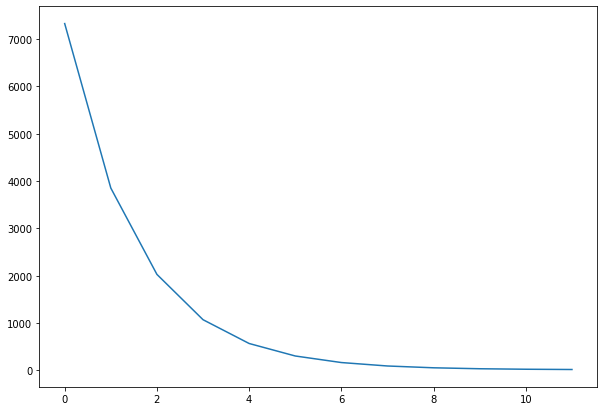

In [19]:
plt.figure(figsize=(10,7))
plt.plot(costs)
plt.show()

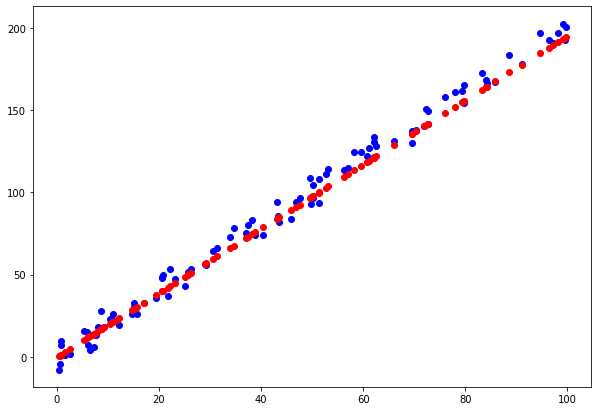

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[11], color='red')
plt.show()

In [21]:
params

array([-0.42997001,  1.97470384])

## Метод стохастического градиентного спуска

In [56]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])
    print("param0:", params[0], "param1:", params[1], "cost:", cost)    

param0: 0.07507634429068048 param1: 1.0505678661419102 cost: 2989.0316295838393
param0: 0.07804500588659082 param1: 1.133233156020514 cost: 1569.70482949392
param0: 0.08089035042824448 param1: 1.1699206066127312 cost: 1312.3620842926414
param0: 0.08520916395760504 param1: 1.367045896440512 cost: 1205.538915223803
param0: 0.08794927844502341 param1: 1.486929989491775 cost: 710.4853588481379
param0: 0.09190275401353365 param1: 1.7482051104176777 cost: 474.07358808787774
param0: 0.09259678236301239 param1: 1.769830218869376 cost: 128.31742127810688
param0: 0.09490019320371283 param1: 1.9587840321482026 cost: 110.10259107067536
param0: 0.0958638081755406 param1: 2.026131690796914 cost: 18.679730652973298
param0: 0.0969474981168277 param1: 2.1059318165373395 cost: 15.45582576216766
param0: 0.09635841744477502 param1: 2.099372012220022 cost: 31.610541445572238
param0: 0.09577699102505802 param1: 2.0721455628378895 cost: 29.463093897354298
param0: 0.09581758474053088 param1: 2.075898153183808

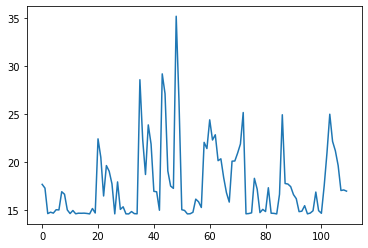

In [49]:
plt.plot(costs[10:])
plt.show()

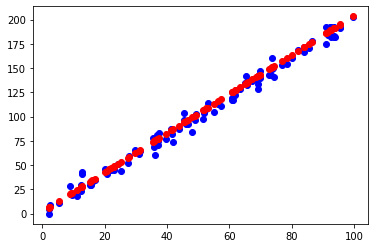

In [50]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [25]:
params

array([0.01634286, 2.03712119])

## Broyden-Fletcher-Goldfarb-Shanno algorithm (BFGS)

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [27]:
def square(X):
    return X[0]**2 + X[1]**2

phi_m = np.linspace(-2, 2, 100)
phi_p = np.linspace(-2, 2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1,1)))
Z = np.array([square(t) for t in XY]).reshape(X.shape)

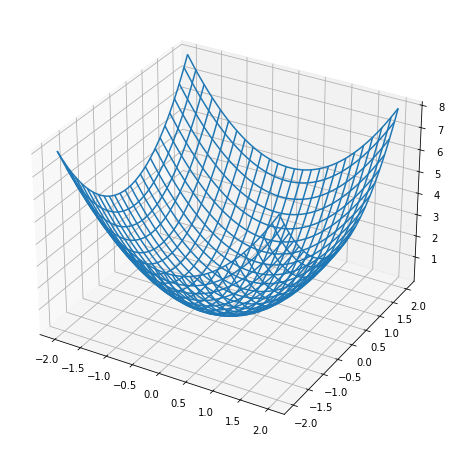

In [28]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
# Add a color bar which maps values to colors.

plt.show()

In [29]:
from scipy.optimize import minimize

In [30]:
res = minimize(square, np.array((1,1)), method='BFGS')

In [31]:
res

      fun: 2.311471135620994e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-6.59986732e-09, -6.59986732e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.07505143e-08, -1.07505143e-08])

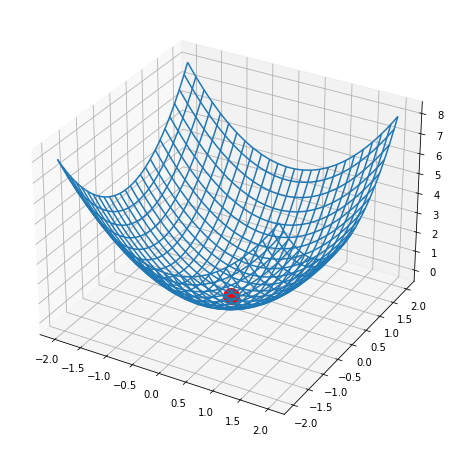

In [32]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)

plt.show()